# Climate Aware Investing

In [135]:
import pandas as pd
import numpy as np
import gurobipy as gp
df_ISD=pd.read_excel('Individual_stock_data.xlsx')

df_SP500=pd.read_excel('SP500.xlsx')
SP500=np.asarray(df_SP500)
df_CF=pd.read_excel('Carbon_footprint.xlsx')
CF=np.asarray(df_CF)
df_ISD=df_ISD.fillna(0)
df_ISD.head()
df_ISD=df_ISD.set_index('Date')

ISD=np.asarray(df_ISD)

In [145]:

df_SP500=df_SP500.set_index('Name')

In [137]:
ISD=np.asarray(ISD,dtype=np.float64)

In [149]:
SP500=np.array(df_SP500)

In [138]:
T= len(ISD)
N=len(CF)
N


505

In [142]:
r=np.zeros((N,T))
for i in range(N):
    for t in range(T):
        if t==0:
            r[i,t]=0
        else:
            if ISD[t-1,i] != 0:
                r[i,t]=(ISD[t,i]-ISD[t-1,i])/ISD[t-1,i]   


In [150]:
r_index=np.zeros(T)
for t in range(T):
    if t==0:
        r_index[t]=0
    else:
        if SP500[t-1] != 0:
            r_index[t]=(SP500[t]-SP500[t-1])/SP500[t-1]   

In [152]:
T= len(ISD)
N=len(CF)

Model = gp.Model(name = 'Climate Aware Investing')

w = {(i) : Model.addVar(vtype=gp.GRB.CONTINUOUS, ub=1, lb=0)                             
              for i in range(N)}


#Contrainte de capacité minimum pour les centrales
CSTR1 = {t : Model.addLConstr(sum(w[i] for i in range(N)), "=" ,1)
        for t in range(T)}

Model.setObjective(sum((w[i]*r[i,t]-r_index[t])**2 for i in range(N) for t in range(T)),gp.GRB.MINIMIZE)

Model.update()
Model.optimize()


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1567 rows, 505 columns and 791335 nonzeros
Model fingerprint: 0x591f0487
Model has 503 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 3e+00]
  QObjective range [5e-02, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1566 rows and 2 columns
Presolve time: 0.09s
Presolved: 1 rows, 503 columns, 503 nonzeros
Presolved model has 503 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.33633286e+08 -1.33822321e+08  4.74e+04 1.14e-13  3.03e+05     0s
   1   7.11965840

In [158]:
import matplotlib.pyplot as plt

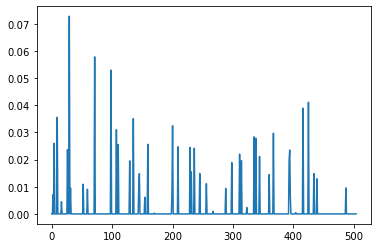

In [159]:
res=[]
for i in range(N) :
    res.append(w[i].x)

plt.plot(res)